In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplolib inline
import warnings 
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplolib` not found.


# this is the Exploratory data analysis for the student performance dataset

In [6]:
df=pd.read_csv("/Users/ravina/Desktop/StudentsPerformance (1).csv", encoding='unicode_escape')

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

information about the datset

# Datachecks to perform
1. check for missing values
2. check duplicates 
3. check datatypes
4. check the number of unique values in each columns
5. check the statistics of the data
6. check various categories present in the different categorical columns


# check for the missing values if any

In [14]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# check for the duplicate values

In [15]:
df.duplicated().sum()

0

there are duplicate  values in the dataset

# Check for Datatypes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#  check the number of unique values in each columns

In [18]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Check statistics of the data

In [19]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights
1. fro the description of neumerical data, all the means are near to each other.
2. all the standard deviation are also very close to each other
3. min score for math=0,for writing=15.19, for reading=14.60 

# Exploring the data

In [23]:
print("categories in 'gender' variable: ", end=" ")
print(df["gender"].unique())

print("categories in 'race/ethnicity' variable: ", end=" ")
print(df["race/ethnicity"].unique())

print("categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())


categories in 'gender' variable:  ['female' 'male']
categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']
categories in 'test preparation course' variable:  ['none' 'completed']


# define our neumerical and categorical features

In [27]:
neumerical_features=[feature for feature in df.columns if df[feature].dtype !="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype =="O"]

print(f"we have {len(neumerical_features)} neumerical features:{neumerical_features}")
print(f"we have {len(categorical_features)} categorical_features:{categorical_features}")

we have 3 neumerical features:['math score', 'reading score', 'writing score']
we have 5 categorical_features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [29]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


# Addding columns for "Total score" and "Average"

In [32]:
df["Total_Score"]=df["math score"]+df["reading score"]+df["writing score"]
df["Average"]=df["Total_Score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
math_full=df[df["math score"]==100]["Average"].count()
reading_full=df[df["reading score"]==100]["Average"].count()
writing_full=df[df["writing score"]==100]["Average"].count()


print(f"nuber of students with maximum score in math is {math_full}")
print(f"nuber of students with maximum score in reading is {reading_full}")
print(f"nuber of students with maximum score in writing is {writing_full}")


nuber of students with maximum score in math is 7
nuber of students with maximum score in reading is 17
nuber of students with maximum score in writing is 14


In [35]:
math_less_20=df[df["math score"]<=20]["Average"].count()
reading_less_20=df[df["reading score"]<=20]["Average"].count()
writing_less_20=df[df["writing score"]<=20]["Average"].count()


print(f"nuber of students with less_20 score in math is {math_less_20}")
print(f"nuber of students with less_20 score in reading is {reading_less_20}")
print(f"nuber of students with less_20 score in writing is {writing_less_20}")

nuber of students with less_20 score in math is 4
nuber of students with less_20 score in reading is 1
nuber of students with less_20 score in writing is 3


from above we observed that the students performed worst in math and best in reading

# Exploring data (visualization)

Visualise average score distribution 
1. histogram
2. KDE

<Axes: xlabel='Total_Score', ylabel='Count'>

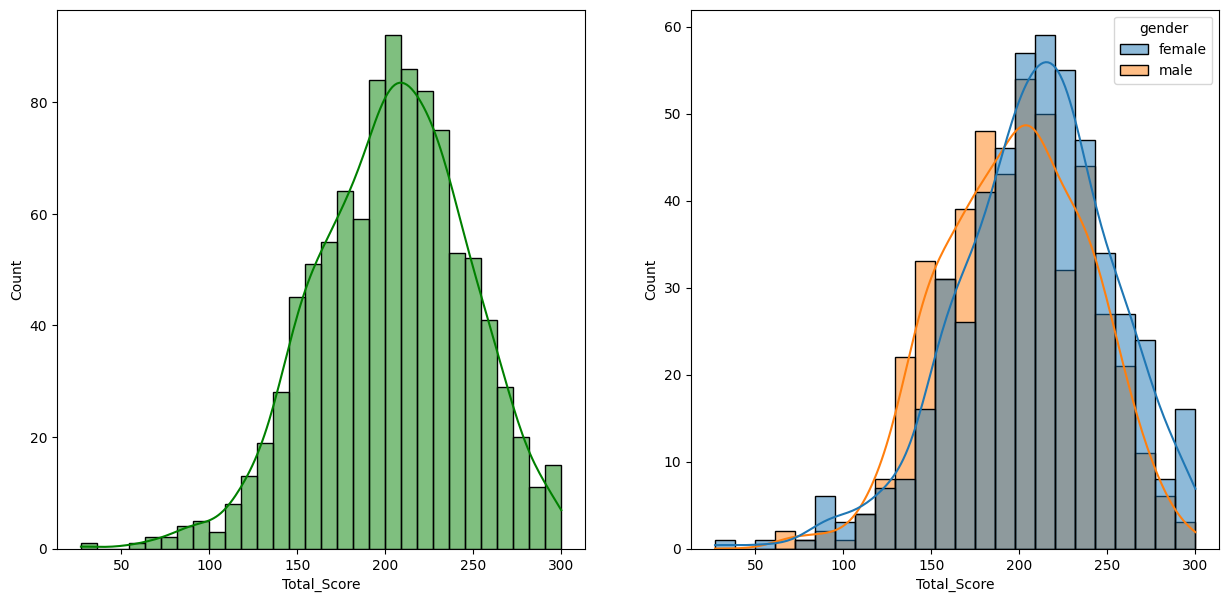

In [41]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Total_Score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="Total_Score",kde=True,hue="gender")


from above it is clear that the female students tends to perform wel  then the male counterparts

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_25415/1151139613.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_25415/1151139613.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_25415/1151139613.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


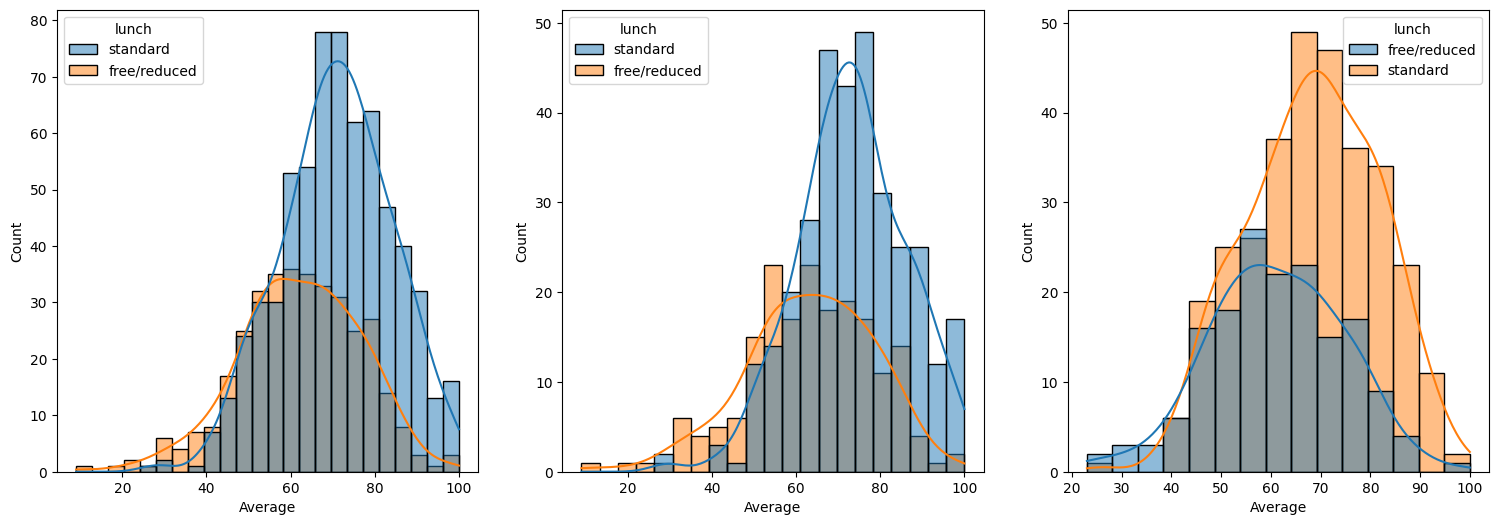

In [49]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="Average",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x="Average",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x="Average",kde=True,hue="lunch")
plt.show()